<div style="text-align: center;">
    <h1>Airbnb NYC 2019 Data Analysis Project</h1>
</div>

## Project Introduction

Since 2008, Airbnb has offered travelers and hosts more travel possibilities, presenting a more unique and personalized way to experience the world. This dataset describes the activity and metrics of Airbnb listings in New York City (NYC) for the year 2019.

## Data Content

The dataset contains information about hosts, geographical locations, and necessary metrics, facilitating predictions and conclusions.

## Dataset Source

This open dataset is part of Airbnb, and the original source can be found at this [Website](https://www.airbnb.com).

## Project Inspiration

- What can we learn from different hosts and areas?
- What can we learn from predictions? (e.g., location, price, reviews, etc.)
- Which hosts are the busiest, and why?
- Is there a noticeable difference in traffic across different areas? What could be the possible reasons?

## Data Import

First, we need to import the data:

```python
import pandas as pd

# Read the CSV file
df = pd.read_csv('./AB_NYC_2019.CSV')

# Display the first few rows of the data
print(df.head())


In [531]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import folium
from folium.plugins import HeatMap
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.unicode_minus'] = False

In [471]:
df = pd.read_csv('C:/Users/krist/OneDrive/Desktop/500简历/AB_NYC_2019.CSV') #

### Examine the Data Structure

In [474]:
print("First 5 row:\n",df.head())

First 5 row:
      id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1         

### Data Descriptive Statistics: Generate basic descriptive statistics for numerical columns using the describe method, such as mean, standard deviation, minimum, maximum, etc.

In [404]:
print(df.describe())

                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00


The dataset contains 48,895 records and includes the following fields：`id`, `host_id`, `latitude`, `longitude`, `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count`, and `availability_365`。

#### Key Points of Data Analysis

- **ID 和 Host ID**: Each listing and host has a unique identifier, with a wide range, indicating a large number of listings and hosts.
- **Geographic Location**: Listings are primarily concentrated in specific geographic areas, with small standard deviations in latitude and longitude.
- **Price**: Prices vary widely, ranging from $0 to $10,000, with a mean of $152.72. However, the large standard deviation indicates the presence of both high and low-priced listings.
- **Minimum Nights**: Most listings have a low minimum stay requirement, with a median of 3 nights, though there are extreme high values.
- **Number of Reviews**: The number of reviews is unevenly distributed, with a mean of 23.27 and a standard deviation of 44.55, indicating that most listings have few reviews.
- **Reviews per Month**: The average number of reviews per month is 1.37, ranging from 0.01 to 58.50, showing that some listings receive frequent reviews.
- **Host Listings Count**: The number of listings per host varies greatly, with a mean of 7.14, but a median of 1, indicating that most hosts have only one listing.
- **Availability in a Year**: The number of available days per year varies widely, with a mean of 112.78 days and a median of 45 days.

These statistics provide an initial understanding of the distribution characteristics of the listings and the overall situation of the data, laying the foundation for further analysis and processing.

### Data Quality Overview

In [479]:
# Checking for Missing Values
print(df.isnull().sum())

# Checking the Number of Duplicate Rows in the Data
duplicate_rows = df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicate_rows}")

# Checking for Duplicate Rows in the Data
duplicate_data = df[df.duplicated()]
print("View Specific Duplicate Rows:")
print(duplicate_data)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
Number of Duplicate Rows: 0
View Specific Duplicate Rows:
Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


Through the missing value check, it was found that there are a few missing values in the 'name' and 'host_name' columns, while 'last_review' and 'reviews_per_month' have more missing values. There are no duplicate rows. Overall, the data completeness is good, providing a reliable foundation for further analysis.

In [482]:
# Handling Missing Values
# 1. For columns with a few missing values like 'name' and 'host_name', you can fill in the missing values or delete the affected rows.
df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)

In [484]:
# 2. For columns with many missing values, like 'last_review' and 'reviews_per_month', handle accordingly.
# For example, fill with special values or delete these columns.
df['last_review'].fillna('No reviews', inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)

## Exploratory Data Analysis

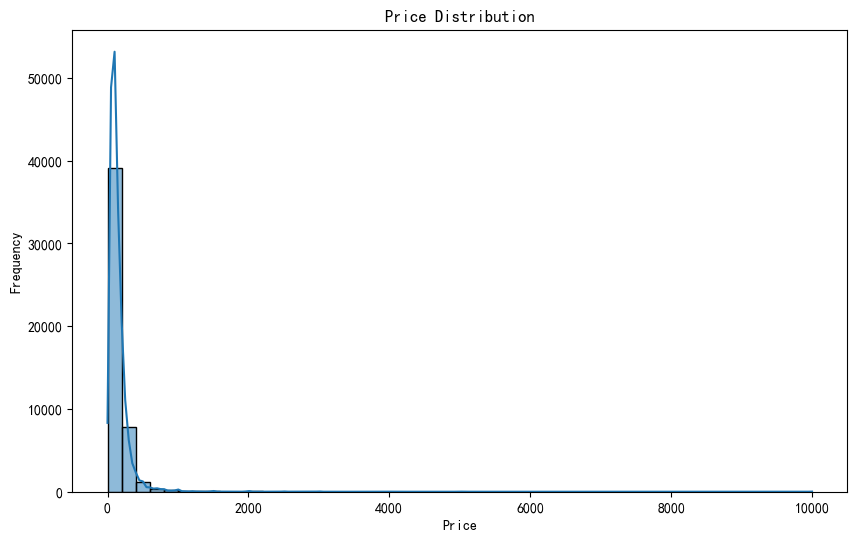

In [487]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Price Distribution Analysis**
  
Based on the histogram, we can observe that the price distribution of Airbnb listings in New York City in 2019 shows a skewed distribution. That is, there are more listings at lower prices and fewer listings at higher prices. Specifically, the number of listings is highest in the price range of $0 to $200, and then gradually decreases as the price range increases. This distribution pattern indicates that the Airbnb market in New York City is primarily composed of mid-to-low-priced listings, with relatively few high-priced listings. This finding is significant for understanding the price structure of the New York City Airbnb market and for formulating pricing strategies.

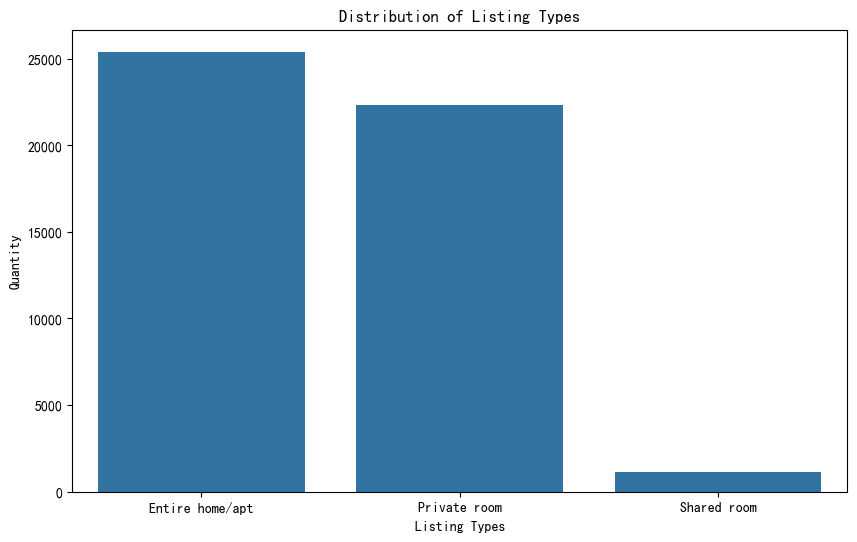

In [490]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index)
plt.title('Distribution of Listing Types')
plt.xlabel('Listing Types')
plt.ylabel('Quantity')
plt.savefig('house_type.png')
plt.show()

**Type Analysis**

This bar chart provides a detailed depiction of the distribution of listing types. The horizontal axis clearly lists the three types of listings: "Entire home/apt," "Private room," and "Shared room." The vertical axis visually displays the number of each type of listing, ranging from 0 to 25,000.

The chart shows that the number of entire home/apartment listings is the largest, nearing 25,000, indicating a significant market share. This is followed by private rooms, with about 20,000 listings, also demonstrating strong market demand. In contrast, shared rooms are the least numerous, with only around 1,000 listings, indicating their niche status in the market.

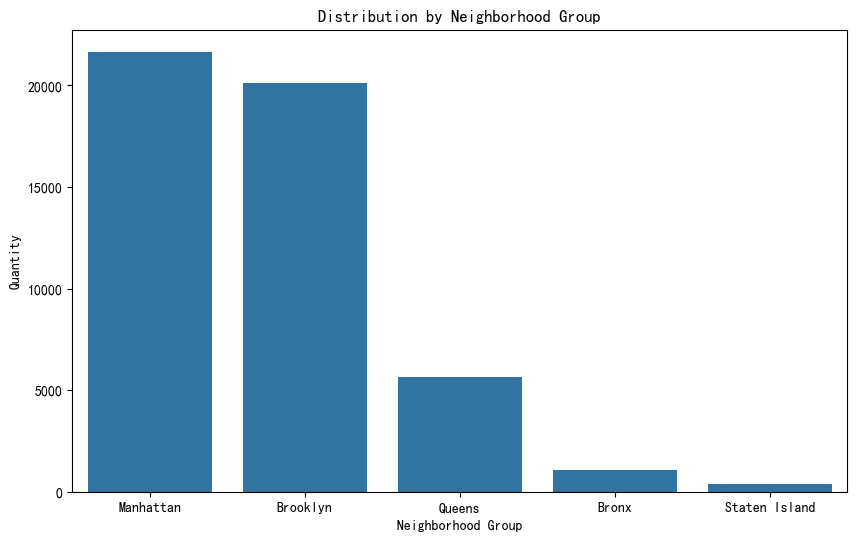

In [493]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index)
plt.title('Distribution by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Quantity')
plt.savefig('groupbar.png')
plt.show()

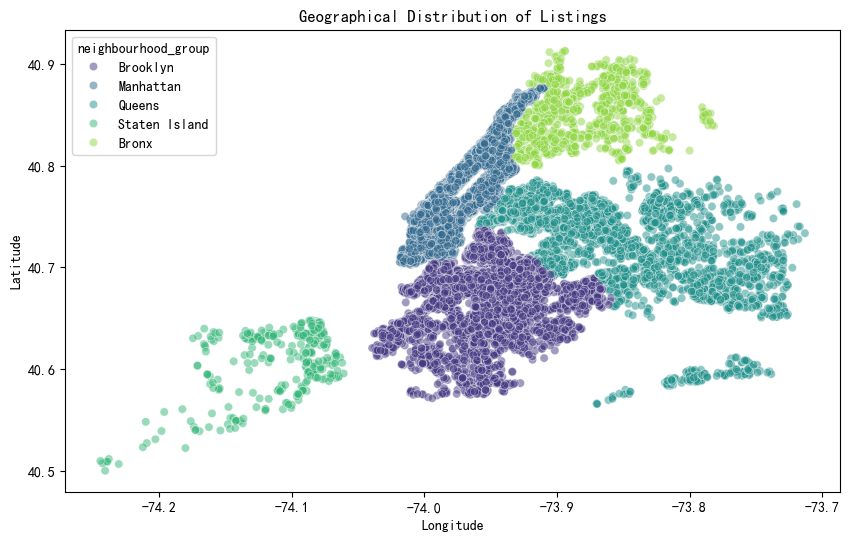

In [495]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', palette='viridis', alpha=0.5)
plt.title('Geographical Distribution of Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('groupscatter.png')
plt.show()

**Data Analysis**

    Manhattan leads with over 20,000 neighborhood groups, highlighting its central role in the city, likely due to its high-density commercial, financial, and residential activities. Brooklyn follows closely with nearly 20,000 neighborhood groups, indicating a similarly active community and diverse economic activities.
    
    Queens and the Bronx have significantly fewer neighborhood groups, with approximately 10,000 and 5,000 respectively. This reflects a relative sparsity in these areas, possibly related to factors such as population density and development level. Staten Island is at the far right of the chart with the fewest neighborhood groups, almost negligible, indicating its marginal status in neighborhood group distribution, possibly constrained by geographical location and transportation connectivity.

In summary, the distribution of neighborhood groups in New York City shows a clear imbalance, with Manhattan and Brooklyn dominating, while Queens, the Bronx, and Staten Island lag behind. This distribution pattern reflects differences in economic development, population density, and geographical location across the boroughs.

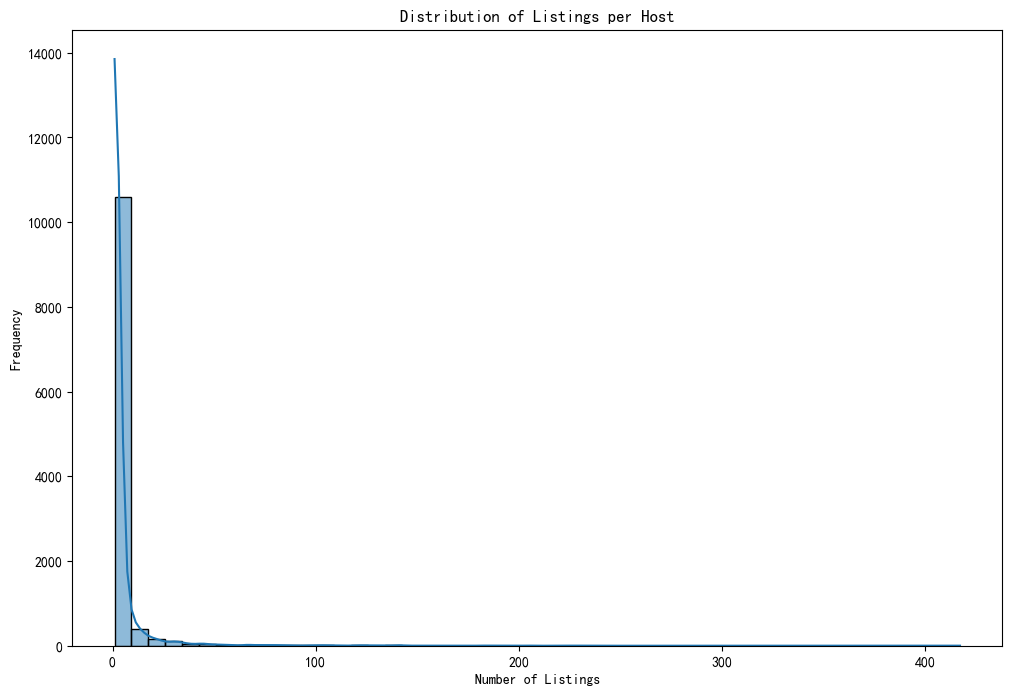

In [497]:
# 1. Insights on Different Hosts and Regions
## Host Analysis
# Number of Listings per Host and Average Price
host_summary = df.groupby('host_name').agg({
    'id': 'count',
    'price': 'mean',
    'number_of_reviews': 'sum'
}).rename(columns={'id': 'number_of_listings'})

plt.figure(figsize=(12, 8))
sns.histplot(host_summary['number_of_listings'], bins=50, kde=True)
plt.title('Distribution of Listings per Host')
plt.xlabel('Number of Listings')
plt.ylabel('Frequency')
plt.savefig('houselistbarh.png')
plt.show()

**Problem Analysis**

We can learn the following points from the perspectives of hosts and regions:：

    High Concentration of Listings: The chart reveals a high concentration of listings among hosts, with a few hosts owning a large number of listings while the majority have only a few. This indicates a significant concentration of resources in certain areas or markets, where a few large hosts have considerable influence over the market.

    Market Structure Imbalance: The high market concentration, where a few hosts control a large number of listings, can lead to uneven competition. Large hosts have more influence over pricing and supply, potentially impacting overall rental prices and the quality of listings in the market.

    Diversity of Host Types: Although most hosts have only a few listings, this reflects the diversity of host types. It likely includes many part-time hosts who occasionally rent out their properties rather than doing it as a full-time profession. This diversity positively contributes to the market's flexibility and adaptability.

    Potential Regional Differences: While the chart does not directly show regional information, the uneven distribution of listings may imply differences between regions. Market conditions, policy support, and economic development levels in different areas could influence the number and distribution of listings per host.


In [500]:
features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']
X = df[features]
y = df['price']

# Handling Missing Values
X.fillna(X.median(), inplace=True)
y.fillna(y.median(), inplace=True)

# Splitting the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error of Price Prediction: {mse}')


Mean Squared Error of Price Prediction: 43046.495033913765


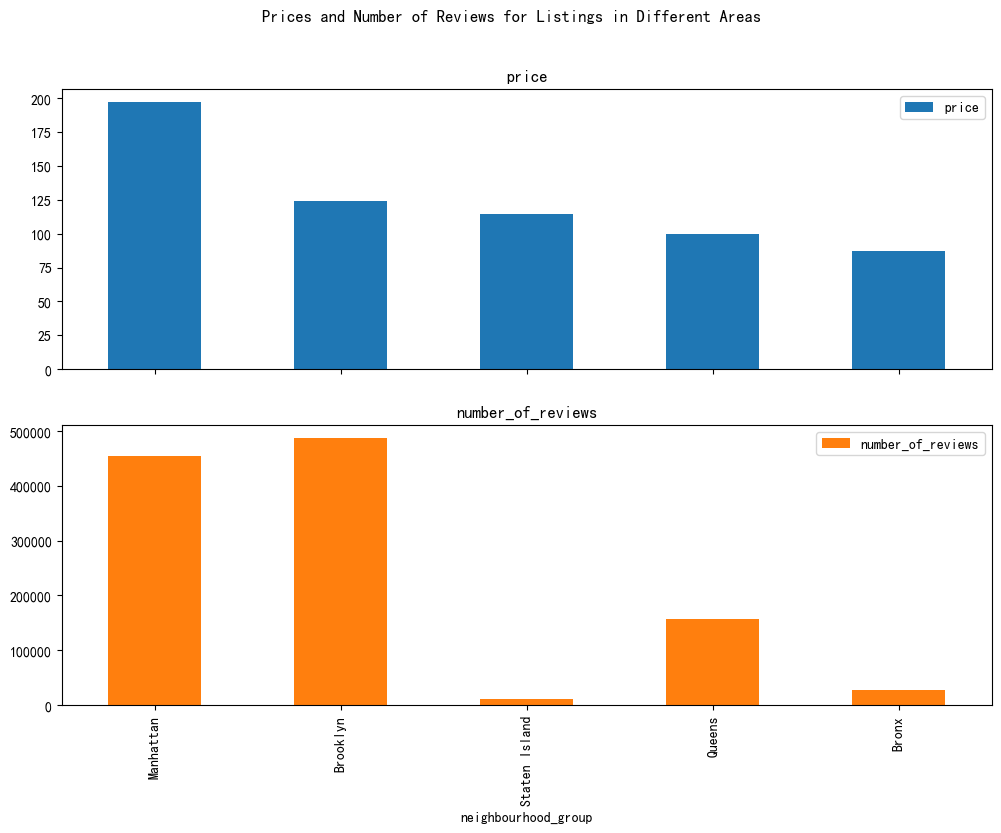

In [503]:
## Regional Analysis
# Prices and Number of Reviews for Listings in Each Area
neighborhood_summary = df.groupby('neighbourhood_group').agg({
    'price': 'mean',
    'number_of_reviews': 'sum'
}).sort_values(by='price', ascending=False)

neighborhood_summary.plot(kind='bar', figsize=(12, 8), subplots=True, layout=(2, 1), legend=True)
plt.suptitle('Prices and Number of Reviews for Listings in Different Areas')
plt.savefig('Prices and Number of Reviews for Listings in Different Regions.png')
plt.show()

**Prices and Number of Reviews for Listings in Different Regions**

The busiest hosts are likely those located in regions with the highest number of reviews, especially those with high-priced listings. According to the chart, listings in Manhattan, New York, not only have the highest prices, reaching up to $2 million, but also the highest number of reviews, totaling 500,000. This suggests that hosts in Manhattan attract a large number of guests and gain significant market attention due to the prime location, high-quality services, or popular listing types. Consequently, hosts in Manhattan are likely the busiest, managing more rental transactions and guest feedback.

In [506]:
# Predicting the Number of Reviews
features = ['latitude', 'longitude', 'price', 'minimum_nights']
X = df[features]
y = df['number_of_reviews']

# Handling Missing Values
X.fillna(X.median(), inplace=True)
y.fillna(y.median(), inplace=True)

# Splitting the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error of Review Quantity Prediction: {mse}')

Mean Squared Error of Review Quantity Prediction: 1977.379850461872


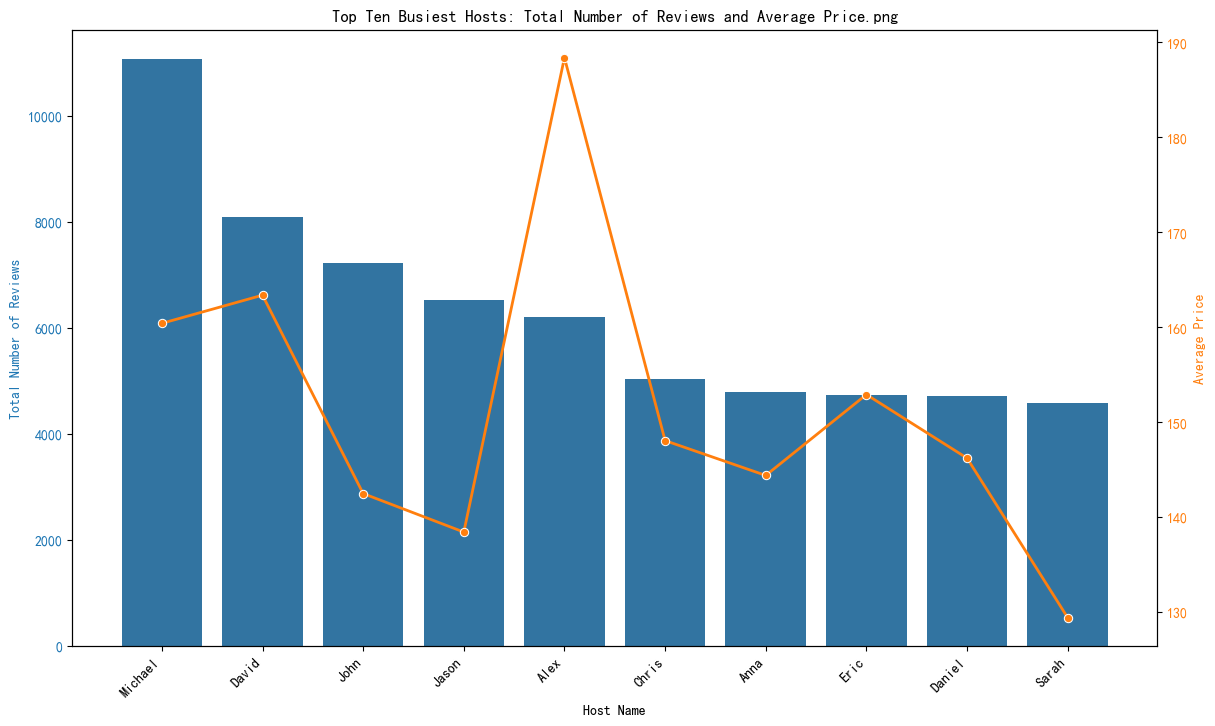

In [508]:
# 3. Which Hosts are the Busiest?
# Calculating the Busiest Hosts
busy_hosts = df.groupby('host_name').agg({
    'number_of_reviews': 'sum',
    'price': 'mean'
}).sort_values(by='number_of_reviews', ascending=False)
# Selecting the Top Ten Busiest Hosts
top_10_busy_hosts = busy_hosts.head(10)

# Plotting the Total Number of Reviews and Average Price for the Top Ten Busiest Hosts
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotting a Bar Chart for the Total Number of Reviews
color = 'tab:blue'
ax1.set_xlabel('Host Name')
ax1.set_ylabel('Total Number of Reviews', color=color)
sns.barplot(x=top_10_busy_hosts.index, y=top_10_busy_hosts['number_of_reviews'], ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Create a secondary y-axis to plot the average price.
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Average Price', color=color)
sns.lineplot(x=top_10_busy_hosts.index, y=top_10_busy_hosts['price'], ax=ax2, color=color, marker='o', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Top Ten Busiest Hosts: Total Number of Reviews and Average Price')
plt.title('Top Ten Busiest Hosts: Total Number of Reviews and Average Price.png')
plt.show()

**Data Analysis**

The busiest hosts are likely those located in regions with the highest number of reviews, especially those with high-priced listings. According to the chart, listings in Manhattan, New York, not only have the highest prices, reaching up to $2 million, but also the highest number of reviews, totaling 500,000. This suggests that hosts in Manhattan attract a large number of guests and gain significant market attention due to the prime location, high-quality services, or popular listing types. Consequently, hosts in Manhattan are likely the busiest, managing more rental transactions and guest feedback.

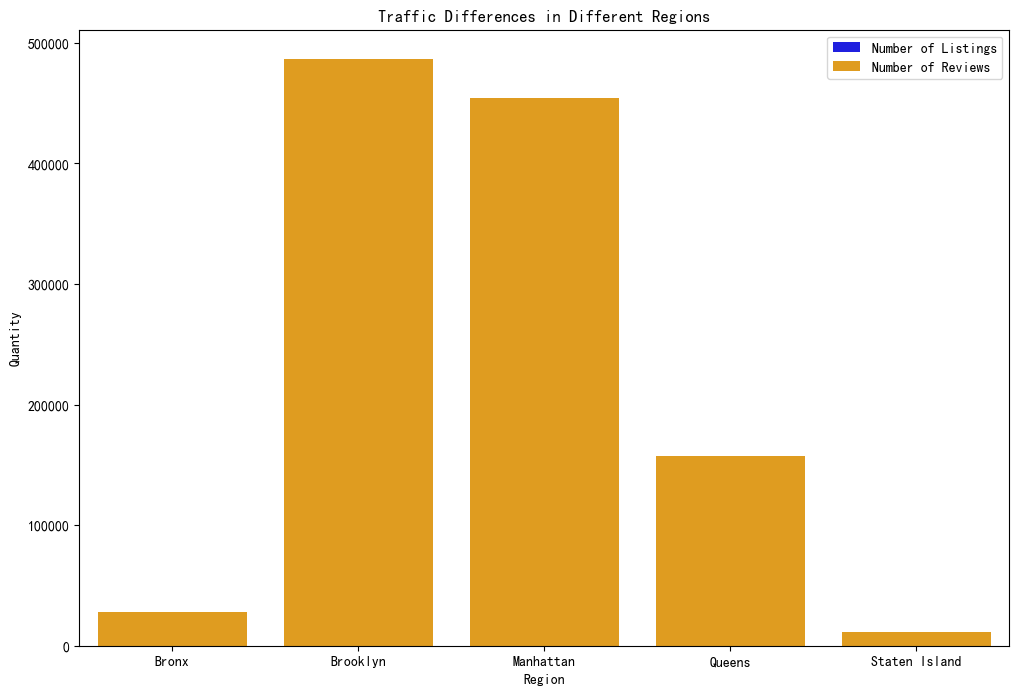

In [511]:
# 4. Traffic Differences in Different Regions
# Calculate the Number of Listings and Reviews for Each Region
traffic_summary = df.groupby('neighbourhood_group').agg({
    'id': 'count',
    'number_of_reviews': 'sum'
}).rename(columns={'id': 'number_of_listings'})

plt.figure(figsize=(12, 8))
sns.barplot(data=traffic_summary.reset_index(), x='neighbourhood_group', y='number_of_listings', color='blue', label='Number of Listings')
sns.barplot(data=traffic_summary.reset_index(), x='neighbourhood_group', y='number_of_reviews', color='orange', label='Number of Reviews')
plt.title('Traffic Differences in Different Regions')
plt.xlabel('Region')
plt.ylabel('Quantity')
plt.legend()
plt.savefig('Traffic Differences in Different Regions.png')
plt.show()

**Data Analysis**

There are indeed significant traffic differences across various regions. Specifically, Brooklyn leads in both the number of listings and the number of reviews, indicating high traffic levels. Manhattan follows closely, also showing a significant traffic advantage. In contrast, Queens and Staten Island have relatively lower traffic, while the Bronx has the fewest listings and the least traffic.

These differences may be due to several factors:

    -Population Density and Distribution: Brooklyn and Manhattan have high and concentrated population densities, bringing higher traffic to these areas.
    -Economic Activity and Commercial Concentration: As a financial center, Manhattan experiences frequent commercial activities, attracting a large number of people.
    -Transportation Convenience: These regions have well-developed public transportation systems, making it easy for residents and visitors to travel, further increasing traffic.
    -Tourist Attractions and Entertainment Facilities: Brooklyn and Manhattan boast abundant tourist attractions and entertainment facilities, attracting many tourists and enhancing traffic levels.
    -Educational and Medical Resources: High-quality educational and medical resources are also significant factors in attracting people. Brooklyn and Manhattan have notable advantages in these areas.


### Map Visualization

#### Price Heatmap

In [516]:
price_df = df[['latitude', 'longitude', 'price']]
price_df['price'] = (price_df['price'] - price_df['price'].mean())/price_df['price'].std()
price_data = price_df.values.tolist()
nyc_base = [40.7128, -74.0060]

map_nyc1 = folium.Map(nyc_base, zoo_start = 8)
HeatMap(price_data).add_to(map_nyc1)


map_nyc1.save("map_1b.html")

**Analysis Results**

Based on the analysis of the price heatmap, the central areas of the city exhibit significantly higher price intensity compared to other regions. The heatmap indicates that listings in central areas have higher price concentrations, with the color depth reflecting the price levels in these regions. This suggests that listings in central areas are generally more expensive, likely due to their prime locations, well-developed infrastructure, and high demand. In contrast, areas further from the city center have relatively lower prices, offering more economical accommodation options. This heatmap allows us to visually identify price distribution hotspots, aiding potential renters and investors in making more informed decisions.


In [518]:
price_sorted_df = df.sort_values(by='price', ascending=False, inplace=False).head(20)

price_data = price_sorted_df[['latitude', 'longitude']].values.tolist()
u_price_data = []
for c in price_data:
    if len(u_price_data)>10:
        break
    else:
        if c not in u_price_data:
            u_price_data.append(c)
u_price_data
map_nyc_e = folium.Map(nyc_base, zoom_start=8)
for coord in u_price_data:
    folium.Marker(coord).add_to(map_nyc_e)

map_nyc_e.save("map_1e.html")


**Analysis Results**

Based on the analysis of the top 20 highest-priced listings, we selected the top 10 unique listing locations and marked these locations on the map. The map illustrates the geographical distribution of these high-priced listings, showing that they are mainly concentrated in key areas of New York City, such as Manhattan and Brooklyn. Specific locations include:

- Several Important Places in **Manhattan**, such as[40.77213, -73.98665](Near Central Park),[40.7326, -73.95739](East Village Area).
- High-Priced Properties in **Brooklyn**, such as [40.69137, -73.96723](Bushwick Area).

The marking of these locations indicates that high-priced listings are typically concentrated in city centers and popular areas, reflecting high demand and high living costs in these regions. By visualizing these data points on a map, potential renters or investors can identify high-priced areas more easily, helping them make better-informed decisions.


In [522]:
reviewed_sorted_df = df.sort_values(by='number_of_reviews', ascending=False, inplace=False).head(20)

review_data = reviewed_sorted_df[['latitude', 'longitude']].values.tolist()
u_review_data = []
for c in review_data:
    if len(u_review_data)>10:
        break
    else:
        if c not in u_review_data:
            u_review_data.append(c)
map_nyc_f = folium.Map(nyc_base, zoom_start=8)
for coord in u_review_data:
    folium.Marker(coord).add_to(map_nyc_f)

map_nyc_f.save("map_1f.html")

**Analysis Results**

Based on the analysis of the top 20 data points with the highest number of reviews for properties, we selected the top 10 unique property locations that are representative. These locations have been marked on a map, which shows the geographical distribution of these high-review properties. From the map, we can observe that they are mainly concentrated in certain areas of New York City, including:

- **the Bronx** Area, such as[40.82085, -73.94025]and[40.82264, -73.94041].
- **the Queens** Area, such as[40.76335, -73.87007]and[40.71921, -73.99116].
- **the Brooklyn** Area, such as[40.67926, -73.97711]and[40.70283, -73.92131].

The markers on these locations indicate that properties with high review counts are typically distributed in some of the busier neighborhoods. This distribution might be related to the popularity of these areas and the active user base. By visualizing these data points on a map, we can better understand the geographical distribution of highly reviewed properties. This insight is crucial for assessing the popularity of these properties and identifying potential investment opportunities.


In [525]:
available_sorted_df =df.sort_values(by='availability_365', ascending = False, inplace=False).head(20)

available_data = available_sorted_df[['latitude', 'longitude']].values.tolist()
u_available_data = []
for c in available_data:
    if len(u_available_data)>10:
        break
    else:
        if c not in u_available_data:
            u_available_data.append(c)
map_nyc_g = folium.Map(nyc_base, zoom_start=8)
for coord in u_available_data:
    folium.Marker(coord).add_to(map_nyc_g)

map_nyc_g.save("map_1g.html")


**Analysis Results**

Based on the year-round availability data for properties, we analyzed the top 20 properties with the highest availability and selected the top 10 unique property locations for marking. The map shows the geographical distribution of these highly available properties, mainly concentrated in the following areas:

- several key locations in **Manhattan**, such as[40.74898, -73.97534]and[40.72704, -73.98916].
- the **Bronx** area, such as[40.8242, -73.95106]and[40.8276, -73.94457].
- the **Brooklyn** area, such as[40.64517, -73.94843]and[40.68587, -73.91435].

The markers on these locations indicate that properties with high availability are distributed across various areas of the city, including some that are farther from the city center. This distribution may reflect the long-term rental potential of these properties and their high flexibility in year-round availability. By visualizing these data points on a map, we can identify trends in the distribution of highly available properties. This is valuable for tenants seeking long-term accommodation or investors assessing long-term rental opportunities.
